In [20]:
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

%matplotlib inline

Using TensorFlow backend.


In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


9


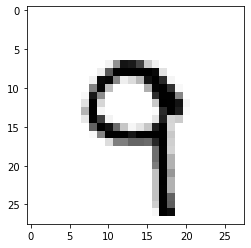

In [12]:
# Show an example image from the training data along with its label
index = int(random.random()*len(x_train))
print(y_train[index])
plt.imshow(x_train[index], cmap='Greys')

In [14]:
# 60k training examples, 28 x 28 pixel images
print(x_train.shape)
# 10k testing examples
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [15]:
# Reshape, only one layer (grayscale)
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
input_shape = (28, 28, 1)

In [17]:
# Convert to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [18]:
# Normalize
x_train /= 255
x_test /= 255

In [22]:
# Create model - convolution, pooling, flatten, relu, dropout, softmax
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape = input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10, activation=tf.nn.softmax))

In [23]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train, y=y_train, epochs=10)


Epoch 1/10
60000/60000 [==============================] - 25s 417us/step - loss: 0.2069 - accuracy: 0.9381
Epoch 2/10
60000/60000 [==============================] - 25s 423us/step - loss: 0.0823 - accuracy: 0.9746
Epoch 3/10
60000/60000 [==============================] - 26s 434us/step - loss: 0.0614 - accuracy: 0.9810
Epoch 4/10
60000/60000 [==============================] - 27s 457us/step - loss: 0.0449 - accuracy: 0.9852
Epoch 5/10
60000/60000 [==============================] - 26s 440us/step - loss: 0.0372 - accuracy: 0.9874
Epoch 6/10
60000/60000 [==============================] - 28s 474us/step - loss: 0.0297 - accuracy: 0.9902s - los
Epoch 7/10
60000/60000 [==============================] - 26s 438us/step - loss: 0.0245 - accuracy: 0.9921
Epoch 8/10
60000/60000 [==============================] - 28s 459us/step - loss: 0.0230 - accuracy: 0.9917
Epoch 9/10
60000/60000 [==============================] - 28s 460us/step - loss: 0.0210 - accuracy: 0.9933
Epoch 10/10
60000/60000 [=====

In [25]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 80us/step


[0.06315859243090835, 0.9853000044822693]

Prediction: 3
Actual: 3


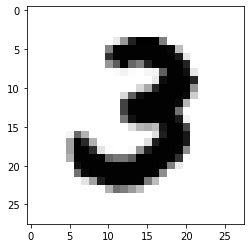

In [48]:
# Show an example image from the training data along with its label
# and its predicted label from the model
index = int(random.random()*len(x_test))
pred = model.predict(x_test[index].reshape(1, 28, 28, 1))
print('Prediction: {}'.format(pred.argmax()))
print('Actual: {}'.format(y_test[index]))
plt.imshow(x_test[index].reshape(28, 28), cmap='Greys')